# Collecting Data

In [1]:
import numpy as np
import pandas as pd
from TwitterAPI import TwitterAPI
from TwitterAPI import TwitterPager

the_consumer_key = "1BZoyqAQd9vLVWS6weUv0lZ62"
the_consumer_secret = "Eyvz28Hr7WdpY4KksBSZGnq47REi1VhCob4RQhw0QIdoFjkr9Y"
the_access_token_key = "66371269-uGXQqaLQb2501HYvPRBiRqK9MuYJoPE3TpwsbQonJ"
the_access_token_secret = "TbFy0CzCHJgPJQoPKmKNv3vtyFajSGzgl0mfuaRLGMhKW"
the_proxy_url = "http://127.0.0.1:7890" 

api = TwitterAPI(consumer_key = the_consumer_key,
                 consumer_secret = the_consumer_secret,
                 access_token_key = the_access_token_key,
                 access_token_secret = the_access_token_secret,
                 proxy_url = the_proxy_url)
r = TwitterPager(api, 'search/tweets', {'q': "electronic cigarette",
                                        'count': 100,
                                        'lang':"en"
                                        })
print(r)

created_at = []
ids = []
name = []
screen_name = []
text = []
source = []
in_reply_to_status_id = []
in_reply_to_status_id_str = []
in_reply_to_screen_name = []
user = []
geo = []
coordinates = []
place = []
contributors = []
is_quote_status = []
retweet_count = []
favorite_count = []
favorited = []
retweeted = []
lang = []
entities = []
entities_user_mentions = []
user_location = []
truncated = []
retweeted_status_entities_urls = []
hashtags = []
for item in r.get_iterator():
    created_at.append(item['created_at'])
    ids.append(item['id'])
    name.append(item['user']['name'])
    text.append(item['text'])
    source.append(item['source'])
    in_reply_to_status_id.append(item['in_reply_to_status_id'])
    in_reply_to_status_id_str.append(item['in_reply_to_status_id_str'])
    in_reply_to_screen_name.append(item['in_reply_to_screen_name'])
    user.append(item['user'])
    geo.append(item['geo'])
    coordinates.append(item['coordinates'])
    place.append(item['place'])
    contributors.append(item['contributors'])
    is_quote_status.append(item['is_quote_status'])
    retweet_count.append(item['retweet_count'])
    favorite_count.append(item['favorite_count'])
    favorited.append(item['favorited'])
    retweeted.append(item['retweeted'])
    lang.append(item['lang'])
    entities.append(item['entities'])
    entities_user_mentions.append(item['entities']['user_mentions'])
    user_location.append(item['user']['location'])
    truncated.append(item['truncated'])
    try :
        if (item['retweeted_status'] != None):
            retweeted_status_entities_urls.append(item['retweeted_status']['entities']['urls'])
    except:
        pass
    hashtags.append(item['entities']['hashtags'])

created_at = np.array(created_at)
ids = np.array(ids)
name = np.array(name)
text = np.array(text)
source = np.array(source)
in_reply_to_status_id = np.array(in_reply_to_status_id)
in_reply_to_status_id_str = np.array(in_reply_to_status_id_str)
in_reply_to_screen_name = np.array(in_reply_to_screen_name)
user = np.array(user)
geo = np.array(geo)
coordinates = np.array(coordinates)
place = np.array(place)
contributors = np.array(contributors)
is_quote_status = np.array(is_quote_status)
retweet_count = np.array(retweet_count)
favorite_count = np.array(favorite_count)
favorited = np.array(favorited)
retweeted = np.array(retweeted)
lang = np.array(lang)
entities = np.array(entities)
entities_user_mentions = np.array(entities_user_mentions)
user_location = np.array(user_location)
hashtags = np.array(hashtags)

test = list(zip(created_at,
                ids,
                name,
                text,
                source,
                in_reply_to_status_id,
                in_reply_to_status_id_str,
                in_reply_to_screen_name,
                place,
                contributors,
                is_quote_status,
                retweet_count,
                favorite_count,
                favorited,
                retweeted,
                lang,
                entities,
                entities_user_mentions,
                user_location,
                hashtags
                ))

name = ['created_at',
      'ids',
      'name',
      'text',
      'source' ,
      'in_reply_to_status_id',
      'in_reply_to_status_id_str',
      'in_reply_to_screen_name',
      'place',
      'contributors',
      'is_quote_status',
      'retweet_count',
      'favorite_count',
      'favorited',
      'retweeted',
      'lang',
      'entities',
      'entities_user_mentions',
      'user_location',
      'hashtags'
     ]

ec = pd.DataFrame(columns = name, data = test)
ec.to_csv("ec.csv", encoding = "utf_8_sig")

In [ ]:
import os

Folder_Path = "./"#'/Users/Connor/Desktop/毕设/合并'
SaveFile_Path = "./"#'/Users/Connor/Desktop/毕设/合并' 
SaveFile_Name = 'Dataset.csv'

os.chdir(Folder_Path)
file_list = os.listdir()

fileStart = 1
fileEnd = len(file_list)
for i in range(fileStart,fileEnd):
    file = Folder_Path + '/' + file_list[i]
    savefile = SaveFile_Path + '/' + SaveFile_Name
    df = pd.read_csv(file, encoding = "utf_8_sig",error_bad_lines=False)
    df.to_csv( savefile, encoding = "utf_8_sig", index = False, header = True,mode = 'a')

In [ ]:
def duplicate(file):
    df = pd.read_csv(file, header = 0,encoding = "utf_8_sig")
    datalist = df.drop_duplicates()
    datalist.to_csv(file, encoding = "utf_8_sig")
    
duplicate("Dataset.csv")

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("./Dataset.csv",error_bad_lines=False)

In [3]:
dataset.shape

(31486, 21)

# Feature View

In [4]:
dataset.columns

Index(['Unnamed: 0', 'created_at', 'ids', 'name', 'text', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_screen_name', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang',
       'entities', 'entities_user_mentions', 'user_location', 'hashtags'],
      dtype='object')

In [5]:
dataset.head(3)

Unnamed: 0                      created_at          ids  \
0           0  Mon Aug 23 11:34:39 +0000 2021  1.42977E+18   
1           1  Mon Aug 23 11:31:51 +0000 2021  1.42977E+18   
2           2  Mon Aug 23 11:31:37 +0000 2021  1.42977E+18   

                          name  \
0              Debi Meinwieser   
1  The Planet is still on Fire   
2                   Logan E. 🏴   

                                                text  \
0  @BillyBaldwin @Laineybug1205 Parents need to t...   
1  RT @Mumbonator: @antoinette_news I am not prom...   
2  RT @ColinMendelsohn: I am doing a free webinar...   

                                              source in_reply_to_status_id  \
0  <a href="http://twitter.com/download/android" ...              1.43E+18   
1  <a href="http://twitter.com/download/android" ...                   NaN   
2  <a href="http://twitter.com/download/iphone" r...                   NaN   

  in_reply_to_status_id_str in_reply_to_screen_name place  ...  \
0                  1.43E+18            BillyBaldwin   NaN  ...   
1                       NaN                     NaN   NaN  ...   
2                       NaN                     NaN   NaN  ...   

  is_quote_status retweet_count favorite_count favorited retweeted lang  \
0           FALSE             0              0     FALSE     FALSE   en   
1           FALSE             4              0     FALSE     FALSE   en   
2           FALSE            17              0     FALSE     FALSE   en   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [], 'symbols': [], 'user_mentions...   
2  {'hashtags': [{'text': 'vaping', 'indices': [7...   

                              entities_user_mentions     user_location  \
0  [{'screen_name': 'BillyBaldwin', 'name': 'Bill...    Toms River, NJ   
1  [{'screen_name': 'Mumbonator', 'name': 'Immuni...               NaN   
2  [{'screen_name': 'ColinMendelsohn', 'name': 'C...  Western New York   

                                    hashtags  
0                                         []  
1                                         []  
2  [{'text': 'vaping', 'indices': [75, 82]}]  

[3 rows x 21 columns]

In [6]:
dataset.describe()

Unnamed: 0
count  31486.000000
mean   15743.132059
std     9090.014511
min        0.000000
25%     7871.250000
50%    15743.500000
75%    23614.750000
max    31489.000000

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31486 entries, 0 to 31485
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 31486 non-null  int64 
 1   created_at                 31486 non-null  object
 2   ids                        31486 non-null  object
 3   name                       31483 non-null  object
 4   text                       31486 non-null  object
 5   source                     31486 non-null  object
 6   in_reply_to_status_id      6957 non-null   object
 7   in_reply_to_status_id_str  6957 non-null   object
 8   in_reply_to_screen_name    7128 non-null   object
 9   place                      286 non-null    object
 10  contributors               1 non-null      object
 11  is_quote_status            31486 non-null  object
 12  retweet_count              31486 non-null  object
 13  favorite_count             31486 non-null  object
 14  favori

In [8]:
random_index = np.random.choice(dataset.shape[0],10)

In [9]:
random_index

array([27852, 24931, 20439,  2472, 11945, 27621, 29610, 12655, 20194,
       28840])

## Clear Data

In [10]:
for index,k in enumerate(dataset["text"].iloc[random_index]):
    print(" ")
    print("iow={}".format(random_index[index]))
    print(k)

 
iow=27852
I just wrote a review on Fling Original Disposables (x10) https://t.co/8Uscl12LqY via @yotpo
 
iow=24931
RT @ChaunceyGardner: @NationalPTA How many vaped nicotine frequently?  Daily?  How many daily users were "hooked"?  How many daily users ne…
 
iow=20439
RT @vapers_alliance: “We know, for many people, vaping is a pathway away from traditional cigarettes” #Vaping is the solution! Watch the la…
 
iow=2472
RT @VinGuptaMD: When most threats to our health are now pulmonary — wildfire smoke, respiratory pandemics, or tobacco/vaping — better to tr…
 
iow=11945
Once again the WHO fails to recognize vaping as a powerful tool to help smokers quit
@mchapliaa urges the WHO and E… https://t.co/7hlMu3SL4U
 
iow=27621
RT @KnowTheRealCost: Toxic metals can be as scary as a monster, but they’re scariest when they’re inside your lungs 😱 #TheRealCost #Vape #V…
 
iow=29610
RT @Uwelltech: Hey robot, is this what you wanna give to me? 

Oh thanks, #Caliburn G is exactly what I want!

Have you

## nltk

In [11]:
# Use TweetTokenizer to tokenise a Tweet Text
from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer()

def tokenizer_tweets(dataset):
    text = ''
    for t in dataset['text']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(dataset)
print(len(tokens))
print(tokens[:20])

664200
['@billybaldwin', '@laineybug1205', 'parents', 'need', 'to', 'take', 'responsibility', 'for', 'their', 'own', "children's", 'actions', '!', 'adults', 'are', 'tryin', '…', 'https://t.co/2vxnfhca0xrt', '@mumbonator', ':']


In [12]:
# Remove stop words and other noise(links and special characters) to get clear tokens
from nltk.corpus import stopwords
import string

punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

In [13]:
tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

265821
['parents', 'need', 'take', 'responsibility', "children's", 'actions', 'adults', 'tryin', 'promoting', 'vaping', 'plume', 'someone', 'vapes', 'shows', "can't", 'see', 'breath', 'free', 'webinar', 'health']


In [14]:
# Top 10 mentions
from nltk import FreqDist
mentions = [t for t in tokens if t.startswith('@')]
mentions_fd = FreqDist(mentions).most_common(10)

# Top 10 hashtags
hashtags = [t for t in tokens if (t.startswith('#') and len(t) != 1)]
hashtags_fd = FreqDist(hashtags).most_common(10)

In [15]:
mentions_fd

[('@biotechclinical', 824),
 ('@chaunceygardner', 765),
 ('@billybaldwin', 572),
 ('@alexwodak', 517),
 ('@vinguptamd', 501),
 ('@fdatobacco', 501),
 ('@tobaccofreekids', 494),
 ('@mohfw_india', 486),
 ('@pib_india', 416),
 ('@mansukhmandviya', 383)]

In [16]:
hashtags_fd

[('#vaping', 2034),
 ('#publichealthengland', 1280),
 ('#cancerresearchuk', 1121),
 ('#ecig', 1092),
 ('#vape', 569),
 ('#1billionsuccesses', 248),
 ('#covid19', 235),
 ('#uwell', 176),
 ('#eliquid', 173),
 ('#vapelife', 150)]

In [17]:
# Extract the mean of lenghts:
import numpy as np

mean = np.mean([len(i) for i in dataset.text])

print("The lenght's average in tweets: %.2f%%" % mean) 
# The lenght's average in tweets: 110.91%

The lenght's average in tweets: 122.80%


In [18]:
# Extract the tweet with more FAVs and more RTs:

fav_max = np.max(dataset['favorite_count'])
rt_max  = np.max(dataset['retweet_count'])

fav = dataset[dataset.favorite_count == fav_max].index[0]
rt  = dataset[dataset.retweet_count == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(dataset['text'][fav]))
print("Number of likes: {}".format(fav_max))
print()
# Max RTs:
print("The tweet with more retweets is: \n{}".format(dataset['text'][rt]))
print("Number of retweets: {}".format(rt_max))

The tweet with more likes is: 
text
Number of likes: favorite_count

The tweet with more retweets is: 
text
Number of retweets: retweet_count


In [19]:
# Create time series for data:
tfav = pd.Series(data=dataset['favorite_count'].values, index=dataset['created_at'])
tret = pd.Series(data=dataset['retweet_count'].values, index=dataset['created_at'])

In [20]:
# Obtain all possible sources:
sources = list({source for source in dataset['source']})

print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* <a href="https://twitter.com/LagomTalks" rel="nofollow">Proliferation</a>
* <a href="https://radio.co" rel="nofollow">Radio.co now playing</a>
* <a href="https://www.nonli.com" rel="nofollow">Nonli</a>
* <a href="https://www.twitter.com/Vaporwave_Bot_" rel="nofollow">VaporwaveBot02</a>
* <a href="http://www.myplume.com/" rel="nofollow">Plume for Android</a>
* <a href="https://help.twitter.com/en/using-twitter/how-to-tweet#source-labels" rel="nofollow">biedexmarketsapp</a>
* <a href="http://www.devdiscourse.com/" rel="nofollow">Devdiscourse News Desk</a>
* <a href="https://help.twitter.com/en/using-twitter/how-to-tweet#source-labels" rel="nofollow">North Shore Dispatches</a>
* <a href="https://help.twitter.com/en/using-twitter/how-to-tweet#source-labels" rel="nofollow">Views on Drugs App</a>
* <a href="http://www.salesforce.com" rel="nofollow">Salesforce - Social Studio</a>
* <a href="http://www.local.site" rel="nofollow">Dogship Seven</a>
* <a href="https

In [21]:
sources_fq = {s:len(dataset[dataset.source == s]) for s in sources}
sources_fq

{'<a href="https://twitter.com/LagomTalks" rel="nofollow">Proliferation</a>': 1,
 '<a href="https://radio.co" rel="nofollow">Radio.co now playing</a>': 1,
 '<a href="https://www.nonli.com" rel="nofollow">Nonli</a>': 1,
 '<a href="https://www.twitter.com/Vaporwave_Bot_" rel="nofollow">VaporwaveBot02</a>': 5,
 '<a href="http://www.myplume.com/" rel="nofollow">Plume\xa0for\xa0Android</a>': 1,
 '<a href="https://help.twitter.com/en/using-twitter/how-to-tweet#source-labels" rel="nofollow">biedexmarketsapp</a>': 1,
 '<a href="http://www.devdiscourse.com/" rel="nofollow">Devdiscourse News Desk</a>': 1,
 '<a href="https://help.twitter.com/en/using-twitter/how-to-tweet#source-labels" rel="nofollow">North Shore Dispatches</a>': 1,
 '<a href="https://help.twitter.com/en/using-twitter/how-to-tweet#source-labels" rel="nofollow">Views on Drugs App</a>': 1,
 '<a href="http://www.salesforce.com" rel="nofollow">Salesforce - Social Studio</a>': 7,
 '<a href="http://www.local.site" rel="nofollow">Dogship

# Top20

In [22]:
from nltk import FreqDist

def get_top10_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [23]:
# Top 10 mentions
aite_top10 = get_top10_of('@')

In [24]:
aite_top10 = np.array(aite_top10)

In [25]:
aite_top10.shape

(20, 2)

In [26]:
num = []
for i in range(20):
    num.append(int(aite_top10[i:i+1,1:2]))

string = []
for j in range(20):
    string.append(str(aite_top10[i:i+1,0:1]))

In [27]:
import matplotlib.pyplot as plt
name_list = string
num_list  = num
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.bar(range(len(num_list)), num_list,color='rgb',tick_label=name_list)
plt.show()

D:\Software\Software_Install\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  


<Figure size 2000x1000 with 1 Axes>

In [28]:
# Top 10 hashtags
hashtags_10 = get_top10_of('#')
hashtags_top10 = np.array(hashtags_10)

In [29]:
hashtags_num = []
for i in range(20):
    hashtags_num.append(int(hashtags_top10[i:i+1,1:2]))

hashtags_string = []
for j in range(hashtags_top10.shape[0]):
    hashtags_string.append(str(hashtags_top10[j:j+1,0:1]))
#     print()

D:\Software\Software_Install\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  


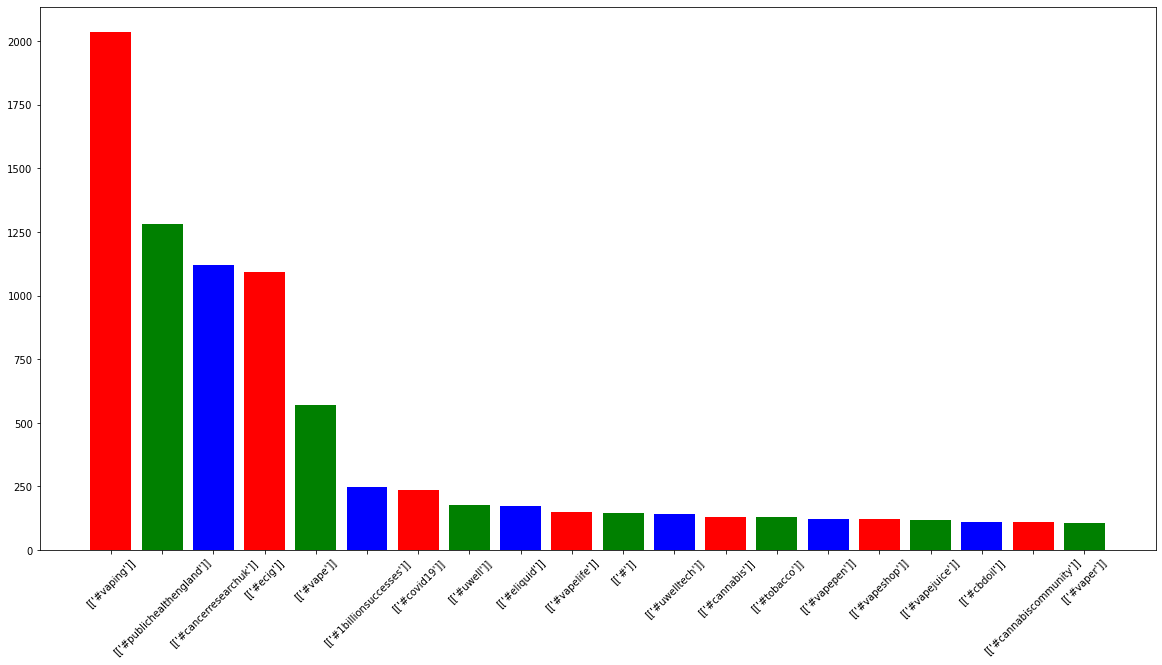

In [30]:
import matplotlib.pyplot as plt
name_list = hashtags_string
num_list  = hashtags_num
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.bar(range(len(num_list)), num_list,color='rgb',tick_label=name_list)
plt.show()

In [31]:
# Top 10 vaping
vaping_10 = get_top10_of('vaping')
vaping_top10 = np.array(vaping_10)

In [32]:
vaping_num = []
for i in range(20):
    vaping_num.append(int(vaping_top10[i:i+1,1:2]))

vaping_string = []
for j in range(vaping_top10.shape[0]):
    vaping_string.append(str(vaping_top10[j:j+1,0:1]))

D:\Software\Software_Install\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  


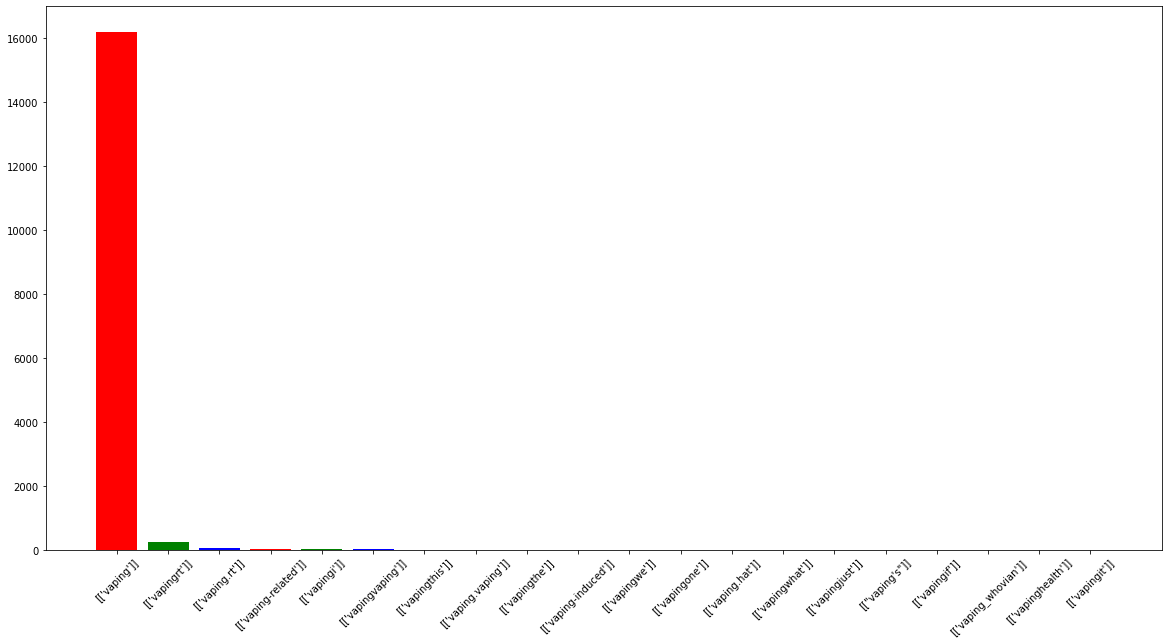

In [33]:
import matplotlib.pyplot as plt
name_list = vaping_string
num_list  = vaping_num
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.bar(range(len(num_list)), num_list,color='rgb',tick_label=name_list)
plt.show()

In [34]:
# Top 10 smoking
smoking_10 = get_top10_of('smoking')
smoking_top10 = np.array(smoking_10)

In [35]:
smoking_num = []
for i in range(len(smoking_top10)):
    smoking_num.append(int(smoking_top10[i:i+1,1:2]))

smoking_string = []
for j in range(len(smoking_top10)):
    smoking_string.append(str(smoking_top10[j:j+1,0:1]))

D:\Software\Software_Install\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  


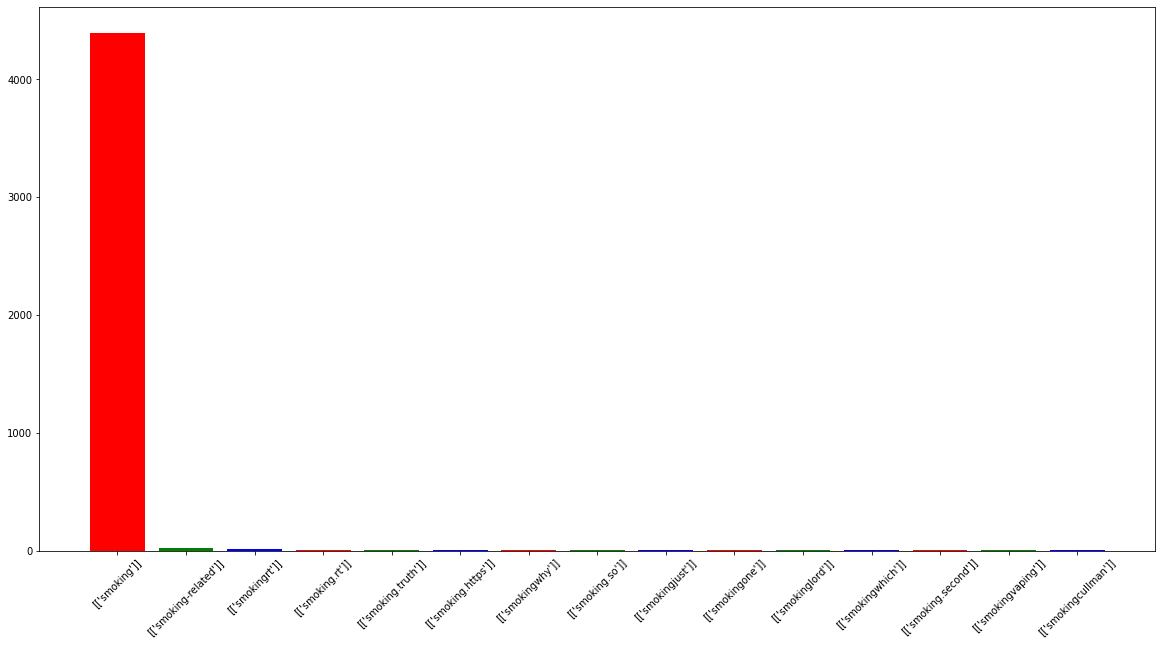

In [36]:
import matplotlib.pyplot as plt
name_list = smoking_string
num_list  = smoking_num
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.bar(range(len(num_list)), num_list,color='rgb',tick_label=name_list)
plt.show()

In [37]:
# Top 10 smoking
e_cigarette_10 = get_top10_of('e-cigarette')
e_cigarette_top10 = np.array(e_cigarette_10)

In [38]:
cigarette_num = []
for i in range(len(e_cigarette_top10)):
    cigarette_num.append(int(e_cigarette_top10[i:i+1,1:2]))

cigarette_string = []
for j in range(len(e_cigarette_top10)):
    cigarette_string.append(str(e_cigarette_top10[j:j+1,0:1]))

D:\Software\Software_Install\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  import sys


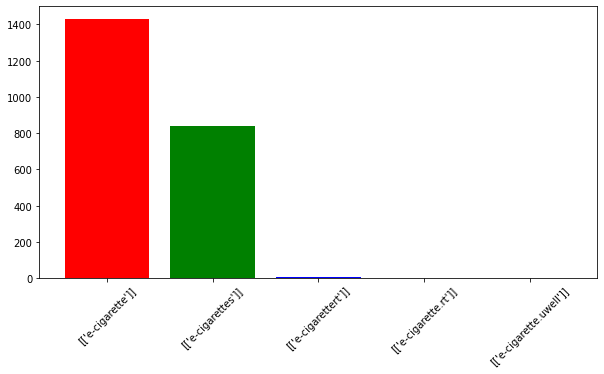

In [39]:
import matplotlib.pyplot as plt

name_list = cigarette_string
num_list  = cigarette_num
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.bar(range(len(num_list)), num_list,color='rgb',tick_label=name_list)
plt.show()

# TF-IDF

## Number of words

In [40]:
dataset['word_count']=dataset["text"].apply(lambda x:len(str(x).split(" ")))  
dataset[['text','word_count']].head(10)

text  word_count
0  @BillyBaldwin @Laineybug1205 Parents need to t...          16
1  RT @Mumbonator: @antoinette_news I am not prom...          25
2  RT @ColinMendelsohn: I am doing a free webinar...          23
3  @JackPosobiec They want a 16 year old to be ab...          24
4  RT @Msmariablack: @TrishMask @DarbysCastle If ...          21
5  The Italian Department of Prison Administratio...          19
6  @marykfoy is calling for the legal age of any ...          22
7  @TrishMask @DarbysCastle If the "mysterious va...          19
8  @BillyBaldwin @Laineybug1205 First of all the ...          21
9  RT @SmokeFreeFdn: Kenneth Warner, former presi...          18

## Number of characters

In [41]:
dataset['char_count']=dataset["text"].str.len()  
dataset[['text','char_count']].head(10)

text  char_count
0  @BillyBaldwin @Laineybug1205 Parents need to t...         140
1  RT @Mumbonator: @antoinette_news I am not prom...         140
2  RT @ColinMendelsohn: I am doing a free webinar...         139
3  @JackPosobiec They want a 16 year old to be ab...         140
4  RT @Msmariablack: @TrishMask @DarbysCastle If ...         139
5  The Italian Department of Prison Administratio...         140
6  @marykfoy is calling for the legal age of any ...         140
7  @TrishMask @DarbysCastle If the "mysterious va...         140
8  @BillyBaldwin @Laineybug1205 First of all the ...         140
9  RT @SmokeFreeFdn: Kenneth Warner, former presi...         139

## Average vocabulary length

In [42]:
def avg_word(sentence):  
    words=sentence.split()  
    return (sum(len(word) for word in words)/len(words))  

dataset['avg_word']=dataset["text"].apply(lambda x:avg_word(x))  
dataset[['text','avg_word']].head(10)

text  avg_word
0  @BillyBaldwin @Laineybug1205 Parents need to t...  7.812500
1  RT @Mumbonator: @antoinette_news I am not prom...  4.640000
2  RT @ColinMendelsohn: I am doing a free webinar...  5.086957
3  @JackPosobiec They want a 16 year old to be ab...  4.875000
4  RT @Msmariablack: @TrishMask @DarbysCastle If ...  5.666667
5  The Italian Department of Prison Administratio...  6.421053
6  @marykfoy is calling for the legal age of any ...  5.409091
7  @TrishMask @DarbysCastle If the "mysterious va...  6.421053
8  @BillyBaldwin @Laineybug1205 First of all the ...  5.714286
9  RT @SmokeFreeFdn: Kenneth Warner, former presi...  6.777778

##  Number of stops words

In [43]:
from nltk.corpus import stopwords  
stop=stopwords.words('english')  
dataset['stopwords']=dataset['text'].apply(lambda sen:len([x for x in sen.split() if x in stop]))  
dataset[['text','stopwords']].head(10)

text  stopwords
0  @BillyBaldwin @Laineybug1205 Parents need to t...          5
1  RT @Mumbonator: @antoinette_news I am not prom...         10
2  RT @ColinMendelsohn: I am doing a free webinar...          9
3  @JackPosobiec They want a 16 year old to be ab...          9
4  RT @Msmariablack: @TrishMask @DarbysCastle If ...          4
5  The Italian Department of Prison Administratio...          7
6  @marykfoy is calling for the legal age of any ...          9
7  @TrishMask @DarbysCastle If the "mysterious va...          4
8  @BillyBaldwin @Laineybug1205 First of all the ...         10
9  RT @SmokeFreeFdn: Kenneth Warner, former presi...          4

## Number of special characters

In [44]:
dataset['hashtags']=dataset['text'].apply(lambda sen:len([x for x in sen.split() if x.startswith("#")]))  
dataset[['text','hashtags']].head(10)

text  hashtags
0  @BillyBaldwin @Laineybug1205 Parents need to t...         0
1  RT @Mumbonator: @antoinette_news I am not prom...         0
2  RT @ColinMendelsohn: I am doing a free webinar...         1
3  @JackPosobiec They want a 16 year old to be ab...         0
4  RT @Msmariablack: @TrishMask @DarbysCastle If ...         0
5  The Italian Department of Prison Administratio...         0
6  @marykfoy is calling for the legal age of any ...         0
7  @TrishMask @DarbysCastle If the "mysterious va...         0
8  @BillyBaldwin @Laineybug1205 First of all the ...         0
9  RT @SmokeFreeFdn: Kenneth Warner, former presi...         0

## Number of numbers

In [45]:
dataset['numerics']=dataset['text'].apply(lambda sen:len([x for x in sen.split() if x.isdigit()]))  
dataset[['text','numerics']].head(10)

text  numerics
0  @BillyBaldwin @Laineybug1205 Parents need to t...         0
1  RT @Mumbonator: @antoinette_news I am not prom...         0
2  RT @ColinMendelsohn: I am doing a free webinar...         1
3  @JackPosobiec They want a 16 year old to be ab...         1
4  RT @Msmariablack: @TrishMask @DarbysCastle If ...         0
5  The Italian Department of Prison Administratio...         1
6  @marykfoy is calling for the legal age of any ...         1
7  @TrishMask @DarbysCastle If the "mysterious va...         0
8  @BillyBaldwin @Laineybug1205 First of all the ...         0
9  RT @SmokeFreeFdn: Kenneth Warner, former presi...         0

## Number of uppercase words

In [46]:
dataset['upper']=dataset['text'].apply(lambda sen:len([x for x in sen.split() if x.isupper()]))  
dataset[['text','upper']].head()

text  upper
0  @BillyBaldwin @Laineybug1205 Parents need to t...      0
1  RT @Mumbonator: @antoinette_news I am not prom...      3
2  RT @ColinMendelsohn: I am doing a free webinar...      2
3  @JackPosobiec They want a 16 year old to be ab...      0
4  RT @Msmariablack: @TrishMask @DarbysCastle If ...      2

## Pretreatment

### Lowercase conversion

In [47]:
dataset['text']=dataset['text'].apply(lambda sen:" ".join(x.lower() for x in sen.split()))  
dataset['text'].head(10)

0    @billybaldwin @laineybug1205 parents need to t...
1    rt @mumbonator: @antoinette_news i am not prom...
2    rt @colinmendelsohn: i am doing a free webinar...
3    @jackposobiec they want a 16 year old to be ab...
4    rt @msmariablack: @trishmask @darbyscastle if ...
5    the italian department of prison administratio...
6    @marykfoy is calling for the legal age of any ...
7    @trishmask @darbyscastle if the "mysterious va...
8    @billybaldwin @laineybug1205 first of all the ...
9    rt @smokefreefdn: kenneth warner, former presi...
Name: text, dtype: object

### Remove the punctuation

In [48]:
dataset['text'] = dataset['text'].str.replace('[^\w\s]','')  
dataset['text'].head(10)

D:\Software\Software_Install\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0    billybaldwin laineybug1205 parents need to tak...
1    rt mumbonator antoinette_news i am not promoti...
2    rt colinmendelsohn i am doing a free webinar f...
3    jackposobiec they want a 16 year old to be abl...
4    rt msmariablack trishmask darbyscastle if the ...
5    the italian department of prison administratio...
6    marykfoy is calling for the legal age of any t...
7    trishmask darbyscastle if the mysterious vapin...
8    billybaldwin laineybug1205 first of all the on...
9    rt smokefreefdn kenneth warner former presiden...
Name: text, dtype: object

### Remove the stop words

In [49]:
from nltk.corpus import stopwords  
stop=stopwords.words('english')  
dataset['text']=dataset['text'].apply(lambda sen:" ".join(x for x in sen.split() if x not in stop))  
dataset['text'].head(10)

0    billybaldwin laineybug1205 parents need take r...
1    rt mumbonator antoinette_news promoting vaping...
2    rt colinmendelsohn free webinar health profess...
3    jackposobiec want 16 year old able consent abo...
4    rt msmariablack trishmask darbyscastle mysteri...
5    italian department prison administration urged...
6    marykfoy calling legal age tobacco related pro...
7    trishmask darbyscastle mysterious vaping death...
8    billybaldwin laineybug1205 first kids becoming...
9    rt smokefreefdn kenneth warner former presiden...
Name: text, dtype: object

### Remove common words

In [50]:
freq=pd.Series(' '.join(dataset['text']).split()).value_counts()[:10]  
freq

vaping      18149
rt          14850
smoking      4375
nicotine     2110
vape         2044
health       1808
better       1802
quit         1666
tobacco      1633
like         1584
dtype: int64

In [51]:
freq=list(freq.index)  
freq

['vaping',
 'rt',
 'smoking',
 'nicotine',
 'vape',
 'health',
 'better',
 'quit',
 'tobacco',
 'like']

In [52]:
dataset['text']=dataset['text'].apply(lambda sen:' '.join(x for x in sen.split() if x not in freq))  
dataset['text'].head(10)

0    billybaldwin laineybug1205 parents need take r...
1    mumbonator antoinette_news promoting plume som...
2    colinmendelsohn free webinar professionals new...
3    jackposobiec want 16 year old able consent abo...
4    msmariablack trishmask darbyscastle mysterious...
5    italian department prison administration urged...
6    marykfoy calling legal age related product inc...
7    trishmask darbyscastle mysterious deaths weren...
8    billybaldwin laineybug1205 first kids becoming...
9    smokefreefdn kenneth warner former president s...
Name: text, dtype: object

###  Remove scarce word

In [53]:
freq = pd.Series(' '.join(dataset['text']).split()).value_counts()[-10:]  
freq

httpstcoibrxwggevy    1
httpstcojgt0hx3ygc    1
amazingthanx          1
httpstcoznlss67mts    1
httpstcosaqj6rthk9    1
httpstcoojtoz1swck    1
httpstcobjurvtssqu    1
httpstcor9pmnjudqs    1
cornish               1
tsmitty3000           1
dtype: int64

In [54]:
freq = list(freq.index)  
dataset['text'] = dataset['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))  
dataset['text'].head(10)

0    billybaldwin laineybug1205 parents need take r...
1    mumbonator antoinette_news promoting plume som...
2    colinmendelsohn free webinar professionals new...
3    jackposobiec want 16 year old able consent abo...
4    msmariablack trishmask darbyscastle mysterious...
5    italian department prison administration urged...
6    marykfoy calling legal age related product inc...
7    trishmask darbyscastle mysterious deaths weren...
8    billybaldwin laineybug1205 first kids becoming...
9    smokefreefdn kenneth warner former president s...
Name: text, dtype: object

## Spelling proofreading

In [55]:
from textblob import TextBlob  
dataset['text'][:10].apply(lambda x: str(TextBlob(x).correct()))

0    billybaldwin laineybug1205 parents need take r...
1    mumbonator antoinette_news promoting plume som...
2    colinmendelsohn free weimar professional new r...
3    jackposobiec want 16 year old able consent abo...
4    msmariablack trishmask darbyscastle mysterious...
5    italian department prison administration urged...
6    marykfoy calling legal age related product inc...
7    trishmask darbyscastle mysterious deaths weren...
8    billybaldwin laineybug1205 first kiss becoming...
9    smokefreefdn kenneth warned former president s...
Name: text, dtype: object

In [56]:
TextBlob(dataset['text'][1]).words

WordList(['mumbonator', 'antoinette_news', 'promoting', 'plume', 'someone', 'vapes', 'shows', 'cant', 'see', 'breath'])

## Stemming

In [57]:
from nltk.stem import PorterStemmer  
st=PorterStemmer()  
dataset['text'][:10].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))

0    billybaldwin laineybug1205 parent need take re...
1    mumbon antoinette_new promot plume someon vape...
2    colinmendelsohn free webinar profession new re...
3    jackposobiec want 16 year old abl consent abor...
4    msmariablack trishmask darbyscastl mysteri dea...
5    italian depart prison administr urg implement ...
6    marykfoy call legal age relat product includ c...
7    trishmask darbyscastl mysteri death werent cv1...
8    billybaldwin laineybug1205 first kid becom ill...
9    smokefreefdn kenneth warner former presid srnt...
Name: text, dtype: object

## Lemmatization

In [58]:
from textblob import Word  
dataset['text']=dataset['text'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))  
dataset['text'].head()

0    billybaldwin laineybug1205 parent need take re...
1    mumbonator antoinette_news promoting plume som...
2    colinmendelsohn free webinar professional new ...
3    jackposobiec want 16 year old able consent abo...
4    msmariablack trishmask darbyscastle mysterious...
Name: text, dtype: object

## Advanced text processing

### N-grams

In [59]:
TextBlob(dataset['text'][0]).ngrams(2)

[WordList(['billybaldwin', 'laineybug1205']),
 WordList(['laineybug1205', 'parent']),
 WordList(['parent', 'need']),
 WordList(['need', 'take']),
 WordList(['take', 'responsibility']),
 WordList(['responsibility', 'childrens']),
 WordList(['childrens', 'action']),
 WordList(['action', 'adult']),
 WordList(['adult', 'tryin']),
 WordList(['tryin', 'httpstco2vxnfhca0x'])]

### TF

In [60]:
tf1 = (dataset['text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()  
tf1.columns = ['words','tf']  
tf1

words  tf
0       mumbonator   1
1             show   1
2        promoting   1
3          someone   1
4            vapes   1
5  antoinette_news   1
6            plume   1
7           breath   1
8              see   1
9             cant   1

### IDF

In [61]:
import numpy as np  
for i,word in enumerate(tf1['words']):  
    tf1.loc[i, 'idf'] =np.log(dataset.shape[0]/(len(dataset[dataset['text'].str.contains(word)])))  
tf1

words  tf       idf
0       mumbonator   1  8.971004
1             show   1  4.350945
2        promoting   1  6.123192
3          someone   1  5.158801
4            vapes   1  3.656567
5  antoinette_news   1  8.747860
6            plume   1  7.959403
7           breath   1  5.489764
8              see   1  3.687800
9             cant   1  3.830803

### TF-IDF

TF-IDF=TF*IDF

In [62]:
tf1['tfidf']=tf1['tf']*tf1['idf']  
tf1

words  tf       idf     tfidf
0       mumbonator   1  8.971004  8.971004
1             show   1  4.350945  4.350945
2        promoting   1  6.123192  6.123192
3          someone   1  5.158801  5.158801
4            vapes   1  3.656567  3.656567
5  antoinette_news   1  8.747860  8.747860
6            plume   1  7.959403  7.959403
7           breath   1  5.489764  5.489764
8              see   1  3.687800  3.687800
9             cant   1  3.830803  3.830803

### Sklearn

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',  
 stop_words= 'english',ngram_range=(1,1))  
train_vect = tfidf.fit_transform(dataset['text'])  

train_vect

<31486x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 167073 stored elements in Compressed Sparse Row format>

### CBOW

In [64]:
from sklearn.feature_extraction.text import CountVectorizer  
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")  
train_bow = bow.fit_transform(dataset['text'])  
train_bow

<31486x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 182243 stored elements in Compressed Sparse Row format>

### Sentiment a b a

In [65]:
dataset['text'][:10].apply(lambda x:TextBlob(x).sentiment)

0                                    (0.1, 0.2)
1                                    (0.0, 0.0)
2     (0.21212121212121213, 0.4515151515151515)
3                                 (0.3, 0.4125)
4                     (0.0, 0.8333333333333334)
5                                    (0.0, 0.0)
6                    (0.1, 0.30000000000000004)
7                     (0.0, 0.8333333333333334)
8    (0.008333333333333325, 0.6541666666666668)
9                                    (0.0, 0.0)
Name: text, dtype: object

In [66]:
from textblob import TextBlob  
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")  
print(testimonial.sentiment)

Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)


In [67]:
dataset['sentiment'] = dataset['text'].apply(lambda x: TextBlob(x).sentiment[0] )  
dataset[['text','sentiment']].head(10)

text  sentiment
0  billybaldwin laineybug1205 parent need take re...   0.100000
1  mumbonator antoinette_news promoting plume som...   0.000000
2  colinmendelsohn free webinar professional new ...   0.212121
3  jackposobiec want 16 year old able consent abo...   0.300000
4  msmariablack trishmask darbyscastle mysterious...   0.000000
5  italian department prison administration urged...   0.000000
6  marykfoy calling legal age related product inc...   0.100000
7  trishmask darbyscastle mysterious death werent...   0.000000
8  billybaldwin laineybug1205 first kid becoming ...   0.008333
9  smokefreefdn kenneth warner former president s...   0.000000

# Word2Vec

In [68]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

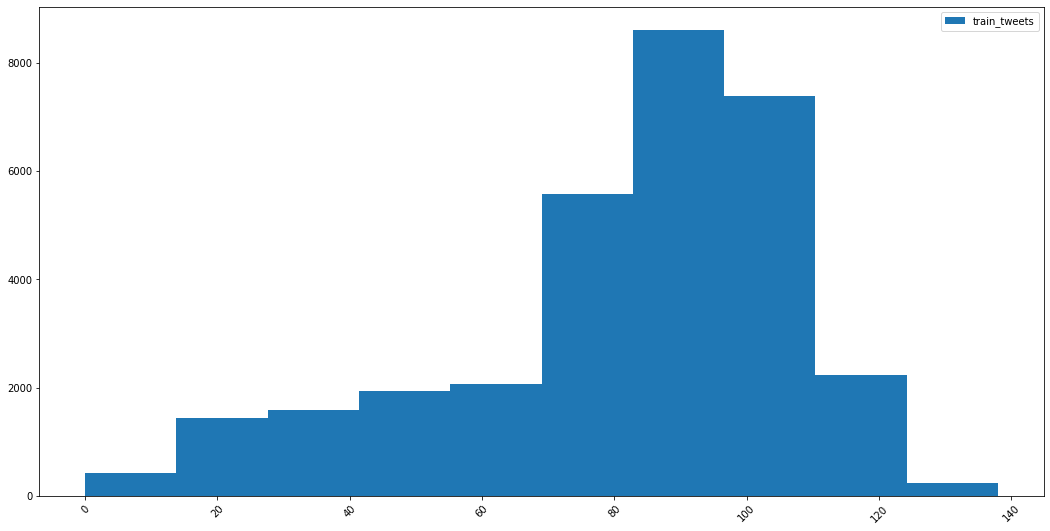

In [69]:
# length of sentence
len_train = dataset['text'].str.len()
plt.figure(figsize=(18,9))
plt.xticks(rotation=45)
plt.hist(len_train, bins = 10, label='train_tweets')
plt.legend()
plt.show()

In [70]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [71]:
dataset['text'] = np.vectorize(remove_pattern)(dataset['text'], '@[\w]*')
dataset["text"].head(10)

0    billybaldwin laineybug1205 parent need take re...
1    mumbonator antoinette_news promoting plume som...
2    colinmendelsohn free webinar professional new ...
3    jackposobiec want 16 year old able consent abo...
4    msmariablack trishmask darbyscastle mysterious...
5    italian department prison administration urged...
6    marykfoy calling legal age related product inc...
7    trishmask darbyscastle mysterious death werent...
8    billybaldwin laineybug1205 first kid becoming ...
9    smokefreefdn kenneth warner former president s...
Name: text, dtype: object

In [72]:
import warnings
warnings.filterwarnings("ignore")

dataset['text'] = dataset['text'].str.replace("[^a-zA-Z#]", " ")
dataset['text'].head(10)

0    billybaldwin laineybug     parent need take re...
1    mumbonator antoinette news promoting plume som...
2    colinmendelsohn free webinar professional new ...
3    jackposobiec want    year old able consent abo...
4    msmariablack trishmask darbyscastle mysterious...
5    italian department prison administration urged...
6    marykfoy calling legal age related product inc...
7    trishmask darbyscastle mysterious death werent...
8    billybaldwin laineybug     first kid becoming ...
9    smokefreefdn kenneth warner former president s...
Name: text, dtype: object

In [73]:
dataset['text'] = dataset['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
dataset['text'].head(10)

0    billybaldwin laineybug parent need take respon...
1    mumbonator antoinette news promoting plume som...
2    colinmendelsohn free webinar professional regu...
3    jackposobiec want year able consent abortion p...
4    msmariablack trishmask darbyscastle mysterious...
5    italian department prison administration urged...
6    marykfoy calling legal related product includi...
7    trishmask darbyscastle mysterious death werent...
8    billybaldwin laineybug first becoming buying b...
9    smokefreefdn kenneth warner former president s...
Name: text, dtype: object

In [74]:
Tokenize_tweet = dataset['text'].apply(lambda x: x.split())
Tokenize_tweet.head(10)

0    [billybaldwin, laineybug, parent, need, take, ...
1    [mumbonator, antoinette, news, promoting, plum...
2    [colinmendelsohn, free, webinar, professional,...
3    [jackposobiec, want, year, able, consent, abor...
4    [msmariablack, trishmask, darbyscastle, myster...
5    [italian, department, prison, administration, ...
6    [marykfoy, calling, legal, related, product, i...
7    [trishmask, darbyscastle, mysterious, death, w...
8    [billybaldwin, laineybug, first, becoming, buy...
9    [smokefreefdn, kenneth, warner, former, presid...
Name: text, dtype: object

In [75]:
from nltk.stem.porter import *

stemmer = PorterStemmer()
Tokenize_tweet = Tokenize_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [76]:
#nltk’s MosesDetokenizer function
for i in range(len(Tokenize_tweet)):
    Tokenize_tweet[i] = ' '.join(Tokenize_tweet[i])
    
dataset['texts'] = Tokenize_tweet

In [77]:
dataset['texts'].head(10)

0    billybaldwin laineybug parent need take respon...
1    mumbon antoinett news promot plume someon vape...
2    colinmendelsohn free webinar profession regul ...
3    jackposobiec want year abl consent abort paren...
4    msmariablack trishmask darbyscastl mysteri dea...
5    italian depart prison administr urg implement ...
6    marykfoy call legal relat product includ chang...
7    trishmask darbyscastl mysteri death werent mas...
8    billybaldwin laineybug first becom buy black h...
9    smokefreefdn kenneth warner former presid srnt...
Name: texts, dtype: object

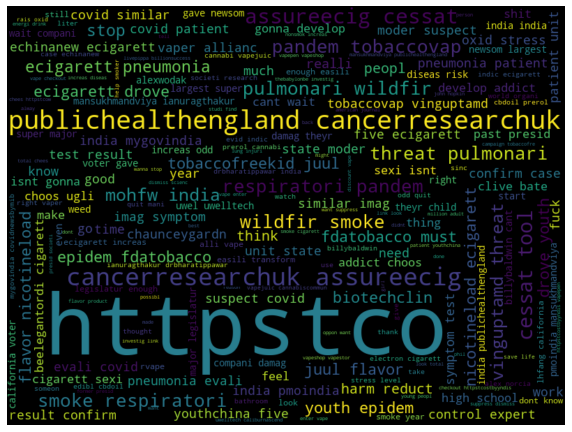

In [78]:
all_words = ' '.join([text for text in dataset['texts']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 600, random_state = 21, max_font_size = 120).generate(all_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [79]:
def hashtag(x):
    hashtags = []
    
    #Loop over words in tweets
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    return hashtags

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [81]:
BOWvectorize = CountVectorizer(max_df=0.90, min_df=2, max_features = 1000, stop_words='english')
BOW = BOWvectorize.fit_transform(dataset['text'])
BOW.shape

(31486, 1000)

In [82]:
TfidfVect = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
Tfidf = TfidfVect.fit_transform(dataset['text'])
Tfidf.shape

(31486, 1000)

In [83]:
Tokenize_tweet = dataset['text'].apply(lambda x: x.split())

In [84]:
Model_W2V = gensim.models.Word2Vec(Tokenize_tweet, size=200, # No. of features
                                   window=5, 
                                   min_count=2, 
                                   sg=1, # 1 for skip-gram model
                                   hs=0,
                                   negative=10, # for negative sampling
                                   workers=2,  # No. of cores
                                   seed=34 )

In [85]:
Model_W2V.train(Tokenize_tweet, total_examples=len(dataset['text']), epochs=20)

(5076846, 5616820)

In [86]:
vape_list = Model_W2V.wv.most_similar(positive='vape')
vape_list_array = np.array(vape_list)

In [87]:
vape_num = []
for i in range(len(vape_list_array)):
    vape_num.append(float(vape_list_array[i:i+1,1:2]))

vape_string = []
for j in range(len(vape_list_array)):
    vape_string.append(str(vape_list_array[j:j+1,0:1]))

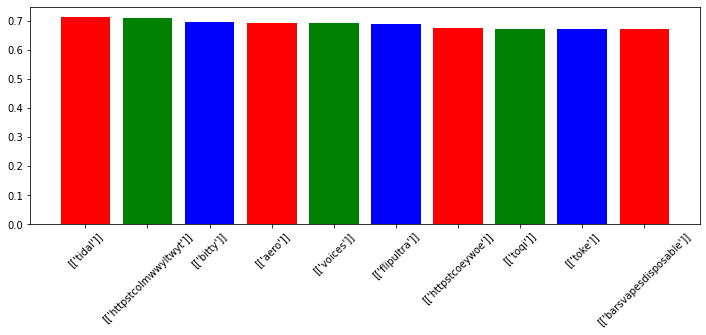

In [88]:
import matplotlib.pyplot as plt
name_list = vape_string
num_list  = vape_num
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
plt.bar(range(len(num_list)), num_list,color='rgb',tick_label=name_list)
plt.show()

In [89]:
health_list = Model_W2V.wv.most_similar(positive='health')
health_list_array = np.array(health_list)

In [90]:
health_num = []
for i in range(len(health_list_array)):
    health_num.append(float(health_list_array[i:i+1,1:2]))

health_string = []
for j in range(len(health_list_array)):
    health_string.append(str(health_list_array[j:j+1,0:1]))

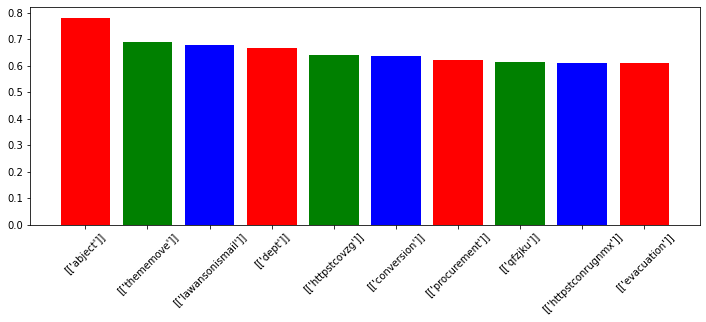

In [91]:
import matplotlib.pyplot as plt
name_list = health_string
num_list  = health_num
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
plt.bar(range(len(num_list)), num_list,color='rgb',tick_label=name_list)
plt.show()

In [92]:
smoke_list = Model_W2V.wv.most_similar(positive='smoke')
smoke_list_array = np.array(smoke_list)

In [93]:
smoke_num = []
for i in range(len(smoke_list_array)):
    smoke_num.append(float(smoke_list_array[i:i+1,1:2]))

smoke_string = []
for j in range(len(smoke_list_array)):
    smoke_string.append(str(smoke_list_array[j:j+1,0:1]))

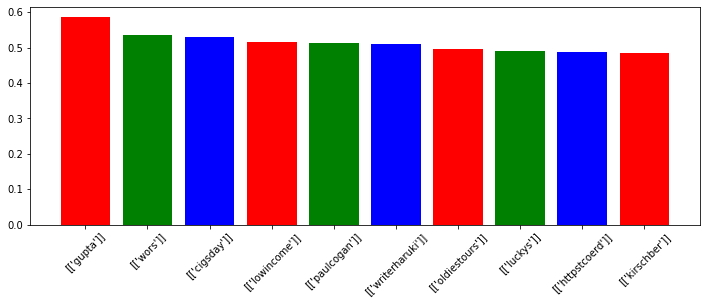

In [94]:
import matplotlib.pyplot as plt
name_list = smoke_string
num_list  = smoke_num
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
plt.bar(range(len(num_list)), num_list,color='rgb',tick_label=name_list)
plt.show()

In [95]:
Model_W2V['tobacco']

array([-0.44868064, -0.2026432 ,  0.11511954,  0.70429283, -0.39715484,
       -0.42156842, -0.00253825, -0.8207168 ,  0.4609093 , -0.14738905,
        0.28642812,  0.13982245,  0.12366076, -0.53186226, -0.4115954 ,
       -0.14191897, -0.03538921, -0.3836678 ,  0.23906016, -0.4025939 ,
       -0.49778074, -0.22564912,  0.876259  , -0.02253641, -0.46102804,
        0.1315127 , -0.09557243,  0.42861152,  0.18607129,  0.56342626,
        0.27045816, -0.06148034,  0.15969771, -0.39749396, -0.03764183,
        0.84336776, -0.69131345, -0.17043577, -0.49653122, -0.32693583,
       -0.3961417 , -0.23386483,  0.04138893, -0.6077709 , -0.28886878,
        0.21523987, -0.14871243,  0.04885953,  0.05093059,  0.35364738,
        0.59337723, -0.6302204 , -0.21311004,  0.02553853, -0.02869968,
       -0.24492206, -0.6791286 ,  0.1803687 , -0.08754053,  0.38008443,
        0.6281103 , -0.31020412, -0.36142403, -0.15525277, -0.26578286,
        0.03366404, -0.35116595, -0.10949892,  0.19516586, -0.17

In [96]:
def word_vec(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += Model_W2V[word].reshape((1, size))
            count += 1
        except KeyError:
            continue
    
    if count != 0:
        vec = vec/count
   
    return vec

In [97]:
Arrays = np.zeros((len(Tokenize_tweet), 200))

for i in range(len(Tokenize_tweet)):
    Arrays[i,:] = word_vec(Tokenize_tweet[i], 200)
Arr_df = pd.DataFrame(Arrays)
Arr_df.shape

(31486, 200)

# glove

In [98]:
Tokenize_tweet[0]

['billybaldwin',
 'laineybug',
 'parent',
 'need',
 'take',
 'responsibility',
 'childrens',
 'action',
 'adult',
 'tryin',
 'httpstco',
 'vxnfhca']

In [99]:
Tokenize_tweet[1]

['mumbonator',
 'antoinette',
 'news',
 'promoting',
 'plume',
 'someone',
 'vapes',
 'show',
 'cant',
 'breath']

In [100]:
import itertools
from glove import Corpus, Glove
sentences = list(itertools.islice(Tokenize_tweet,None))
new_lines =[]
for sentence in sentences:
    new_lines.append(sentence)

In [101]:
corpus = Corpus()
corpus.fit(new_lines, window=10)
glove = Glove(no_components=100, learning_rate=0.1)
glove_model = glove.fit(corpus.matrix, epochs= 100, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

Performing 100 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99


In [102]:
glove.save('glove.model')
print(glove.word_vectors[glove.dictionary['vape']])

[ 0.36890899 -0.20942521  0.37361158 -0.25488108  0.1478832   0.34418457
 -0.08987421 -0.18719571  0.4317152  -0.16861038 -0.58843094 -0.77273948
 -0.0604172  -0.41096609  0.46605698 -0.02430416 -0.14932806 -0.16269206
 -0.59429051 -0.11439338 -0.31477859  0.18913089 -0.00987768 -0.43885407
 -0.36262136  0.00938598  0.12011473  0.30963283 -0.38934027  0.23309235
  0.39122927 -0.06312529 -0.20889958  0.40345965 -0.25071285  0.17208037
  0.04338391 -0.24706776 -0.55004458 -0.07325205 -0.06725274  0.12918326
  0.34696293 -0.015121    0.41668229 -0.33207506  0.03072825  0.34604713
  0.44740753 -0.19757387  0.44534553  0.64004098 -0.35719385  0.25383969
 -0.17193545  0.10579613 -0.03410266 -0.05577327 -0.41402355 -0.10416527
  0.26071252  0.03906341  0.0620173   0.29336226  0.53225382  0.40858772
  0.1598769   0.07643793 -0.18526169 -0.49727958  0.09242107 -0.09444381
  0.03294479  0.56855456  0.08373675 -0.0290954   0.47636761 -0.33650536
 -0.30862157  0.13208339 -0.11443233  0.20388131  0

In [103]:
train_glove =[]
for sentence in new_lines:
    train_glove.append(np.mean([glove.word_vectors[glove.dictionary[sentence[i]]] for i in range(len(sentence))],axis =0))

In [104]:
train_glove[0:1]

[array([ 0.09127509,  0.05106881,  0.03727078,  0.05249803,  0.09418464,
        -0.252427  , -0.00829417, -0.06218285, -0.04385081,  0.10452328,
        -0.06984915,  0.07425717, -0.08057978,  0.01187654,  0.03026063,
         0.09297747, -0.10121716, -0.05214614, -0.13262235,  0.10635862,
        -0.00267193,  0.12182718,  0.00636233,  0.1026386 ,  0.0824895 ,
         0.12777984, -0.08208543,  0.19982584, -0.17643308,  0.03704049,
         0.00174962,  0.1051367 ,  0.07231664,  0.09282764,  0.06216791,
        -0.15376594,  0.20619373,  0.07523151, -0.05604222, -0.01407405,
         0.05809566,  0.02795547,  0.05492371,  0.07836941,  0.02170608,
         0.20907044, -0.09768388,  0.14152679, -0.03386798,  0.02985037,
         0.05379389,  0.0578952 ,  0.03554485,  0.05989323,  0.07056667,
        -0.22422176, -0.03396799,  0.05963325, -0.07176496,  0.02882799,
        -0.08977926,  0.041453  , -0.00835288, -0.07017527, -0.14284592,
         0.20366995, -0.01638786,  0.0175033 ,  0.2

In [105]:
train_glove = np.array(train_glove)

In [106]:
train_glove.shape

(31486,)

In [107]:
unique_words = list(set([word for sublist in [Tokenize_tweet[0]] for word in sublist]))

word_glove_vectors = np.array([glove.word_vectors[glove.dictionary[word]] for word in unique_words])

In [108]:
word_glove_vectors.shape

(12, 100)

In [109]:
# Converting the the feature vectors of the words to 2-D vectors on a 2-D plane for visualzation using T-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=1000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
T.shape

(12, 2)

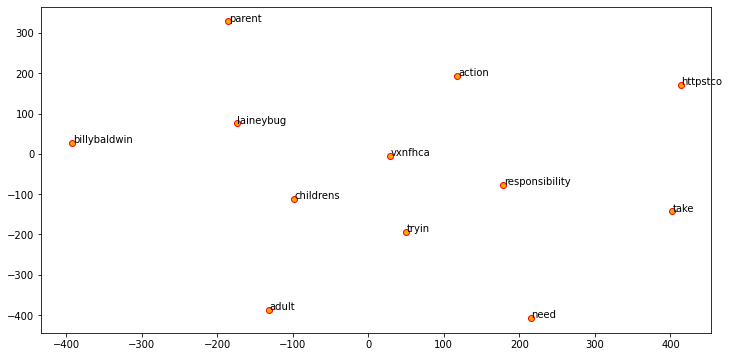

In [110]:
labels = unique_words
plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

## LDA Model Training

In [111]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import pandas

In [112]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')
#print(en_stop)
en_stop.append('rt')
#print(en_stop)
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [113]:
dataset.columns

Index(['Unnamed: 0', 'created_at', 'ids', 'name', 'text', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_screen_name', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang',
       'entities', 'entities_user_mentions', 'user_location', 'hashtags',
       'word_count', 'char_count', 'avg_word', 'stopwords', 'numerics',
       'upper', 'sentiment', 'texts'],
      dtype='object')

In [114]:
dataset.text

0        billybaldwin laineybug parent need take respon...
1        mumbonator antoinette news promoting plume som...
2        colinmendelsohn free webinar professional regu...
3        jackposobiec want year able consent abortion p...
4        msmariablack trishmask darbyscastle mysterious...
                               ...                        
31481    impact flavour device level price adult ecigar...
31482    saferwiki saferthansmoking iqos heated product...
31483    raptor defencematrix sorry invented american c...
31484    saferwiki saferthansmoking iqos heated product...
31485    uscvoicecenter ecigarette vapingrelated vocal ...
Name: text, Length: 31486, dtype: object

In [115]:
tweets = dataset.text.tolist()

In [116]:
for tweet in tweets:
	tweet = str(tweet)
	#print tweet
#print("------")
# list for tokenized documents in loop
texts = []

# loop through document list
for i in tweets:
    print(i)
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

billybaldwin laineybug parent need take responsibility childrens action adult tryin httpstco vxnfhca
mumbonator antoinette news promoting plume someone vapes show cant breath
colinmendelsohn free webinar professional regulation october
jackposobiec want year able consent abortion parent vote httpstcoltuoghvnfx
msmariablack trishmask darbyscastle mysterious death werent mask many people severe
italian department prison administration urged implement circular authorised httpstcoz zkwonq
marykfoy calling legal related product including changed httpstcotqpurgiwk
trishmask darbyscastle mysterious death werent mask many people severe httpstcowu mslf
billybaldwin laineybug first becoming buying black httpstcolbejm tpej
smokefreefdn kenneth warner former president srntorg call rebalancing society consideration specifically
made daal tonight handled fine yesterday double dose dont little bitch httpstcop
vapingit there cdoug march harmreduction lessharmfulalternatives humanrights socialjustice
v

In [117]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary, passes=100)

#print("\n".join(ldamodel.print_topics(num_topics=10, num_words=5)))
print(ldamodel.show_topics(num_topics=4, num_words=8))

[(0, '0.029*"ecigarett" + 0.023*"smoke" + 0.022*"flavor" + 0.017*"youth" + 0.015*"juul" + 0.010*"tobaccofreekid" + 0.010*"fdatobacco" + 0.010*"epidem"'), (1, '0.019*"ecigarett" + 0.012*"pneumonia" + 0.011*"covid" + 0.011*"patient" + 0.010*"vaper" + 0.008*"httpstco" + 0.008*"chaunceygardn" + 0.007*"state"'), (2, '0.011*"peopl" + 0.011*"stop" + 0.010*"dont" + 0.008*"know" + 0.007*"httpstco" + 0.007*"think" + 0.007*"ecigarett" + 0.006*"quit"'), (3, '0.017*"publichealthengland" + 0.016*"india" + 0.015*"cancerresearchuk" + 0.013*"assureecig" + 0.012*"biotechclin" + 0.011*"cessat" + 0.009*"tool" + 0.009*"httpstco"')]


In [118]:
ldamodel.show_topics(num_topics=4, num_words=10)

[(0,
  '0.029*"ecigarett" + 0.023*"smoke" + 0.022*"flavor" + 0.017*"youth" + 0.015*"juul" + 0.010*"tobaccofreekid" + 0.010*"fdatobacco" + 0.010*"epidem" + 0.009*"must" + 0.008*"eliquid"'),
 (1,
  '0.019*"ecigarett" + 0.012*"pneumonia" + 0.011*"covid" + 0.011*"patient" + 0.010*"vaper" + 0.008*"httpstco" + 0.008*"chaunceygardn" + 0.007*"state" + 0.007*"unit" + 0.007*"public"'),
 (2,
  '0.011*"peopl" + 0.011*"stop" + 0.010*"dont" + 0.008*"know" + 0.007*"httpstco" + 0.007*"think" + 0.007*"ecigarett" + 0.006*"quit" + 0.006*"vape" + 0.006*"year"'),
 (3,
  '0.017*"publichealthengland" + 0.016*"india" + 0.015*"cancerresearchuk" + 0.013*"assureecig" + 0.012*"biotechclin" + 0.011*"cessat" + 0.009*"tool" + 0.009*"httpstco" + 0.008*"result" + 0.008*"cigarett"')]

# Kmeans

In [119]:
corpus_copy = dataset['text']

In [120]:
import csv
with open('tweets_cleaned.csv','a',encoding='utf-8',newline='')as file:
    fieldnames = ['cleanedLinks']
    writer = csv.DictWriter(file,fieldnames=fieldnames)
    writer.writeheader()
    for content in corpus_copy:
        writer.writerow({"cleanedLinks":content})
file.close()

In [121]:
corpus_copy_df=pd.read_csv('tweets_cleaned.csv',encoding='utf-8')
corpus_copy_df

cleanedLinks
0      billybaldwin laineybug parent need take respon...
1      mumbonator antoinette news promoting plume som...
2      colinmendelsohn free webinar professional regu...
3      jackposobiec want year able consent abortion p...
4      msmariablack trishmask darbyscastle mysterious...
...                                                  ...
31481  impact flavour device level price adult ecigar...
31482  saferwiki saferthansmoking iqos heated product...
31483  raptor defencematrix sorry invented american c...
31484  saferwiki saferthansmoking iqos heated product...
31485  uscvoicecenter ecigarette vapingrelated vocal ...

[31486 rows x 1 columns]

In [122]:
corpus_copy_df.isnull().sum()

cleanedLinks    56
dtype: int64

In [123]:
corpus_copy_df=corpus_copy_df.dropna()

In [124]:
corpus_copy_df.isnull().sum()

cleanedLinks    0
dtype: int64

In [125]:
corpus_copy_df['length'] = corpus_copy_df['cleanedLinks'].apply(len)
corpus_copy_df

cleanedLinks  length
0      billybaldwin laineybug parent need take respon...     100
1      mumbonator antoinette news promoting plume som...      73
2      colinmendelsohn free webinar professional regu...      60
3      jackposobiec want year able consent abortion p...      75
4      msmariablack trishmask darbyscastle mysterious...      83
...                                                  ...     ...
31481  impact flavour device level price adult ecigar...      77
31482  saferwiki saferthansmoking iqos heated product...      98
31483  raptor defencematrix sorry invented american c...      97
31484  saferwiki saferthansmoking iqos heated product...      98
31485  uscvoicecenter ecigarette vapingrelated vocal ...     102

[31430 rows x 2 columns]

In [126]:
corpus_copy_list = corpus_copy_df['cleanedLinks'].tolist()
corpus_copy_list

['billybaldwin laineybug parent need take responsibility childrens action adult tryin httpstco vxnfhca',
 'mumbonator antoinette news promoting plume someone vapes show cant breath',
 'colinmendelsohn free webinar professional regulation october',
 'jackposobiec want year able consent abortion parent vote httpstcoltuoghvnfx',
 'msmariablack trishmask darbyscastle mysterious death werent mask many people severe',
 'italian department prison administration urged implement circular authorised httpstcoz zkwonq',
 'marykfoy calling legal related product including changed httpstcotqpurgiwk',
 'trishmask darbyscastle mysterious death werent mask many people severe httpstcowu mslf',
 'billybaldwin laineybug first becoming buying black httpstcolbejm tpej',
 'smokefreefdn kenneth warner former president srntorg call rebalancing society consideration specifically',
 'made daal tonight handled fine yesterday double dose dont little bitch httpstcop',
 'vapingit there cdoug march harmreduction lessh

In [127]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_copy_list)

In [128]:
X.dtype

dtype('float64')

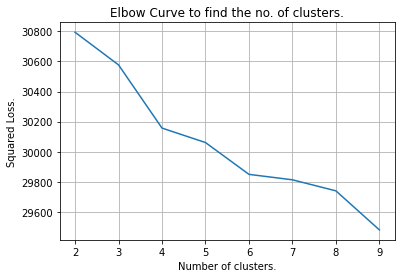

In [129]:
from sklearn import cluster
from sklearn.cluster import KMeans
#Elbow Method
def elbow(words_vector):
    num_cluster = [x for x in range(2,10)]
    
    squared_errors = []
    for cluster in num_cluster:
        kmeans = KMeans(n_clusters = cluster).fit(words_vector) # Train Cluster
        squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list
        
    optimal_clusters = np.argmin(squared_errors)# As argmin return the index of minimum loss. 
    plt.plot(num_cluster, squared_errors)
    plt.title("Elbow Curve to find the no. of clusters.")
    plt.xlabel("Number of clusters.")
    plt.ylabel("Squared Loss.")
    plt.grid(True)
    plt.show()
    return optimal_clusters

optimal_clusters_elbow = elbow(X)

### k-means

Function that runs the K-Means algorithm max_k times and returns a dictionary of each k result.

In [130]:
# Define the k-means clustering function which will call sklearn's KMeans function
def k_means(feature_matrix, num_clusters):
    km = KMeans(n_clusters=num_clusters,
                max_iter=10000)
    km.fit(feature_matrix)
    clusters = km.labels_
    return km, clusters

In [131]:
def get_cluster_data(clustering_obj, tweet_data, 
                     feature_names, num_clusters,
                     topn_features=10):

    cluster_details = {}  
    # Get cluster centroids
    ordered_centroids = clustering_obj.cluster_centers_.argsort()[:, ::-1]
    # Get key features for each cluster
    # Get news articles belonging to each cluster
    for cluster_num in range(num_clusters):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster_num'] = cluster_num
        key_features = [feature_names[index] 
                        for index 
                        in ordered_centroids[cluster_num, :topn_features]]
        cluster_details[cluster_num]['key_features'] = key_features
        
        article = tweet_data[tweet_data['Cluster'] == cluster_num]['cleanedLinks'].values.tolist()
        cluster_details[cluster_num]['cleanedLinks'] = article
    
    return cluster_details

In [132]:
def print_cluster_data(cluster_data):
    # Print cluster details
    for cluster_num, cluster_details in cluster_data.items():
        print('Cluster {} details:'.format(cluster_num))
        print('-'*20)
        print('Key features:', cluster_details['key_features'])
        #print('Tweets in this cluster:')
        #print(', '.join(cluster_details['cleanedLinks'][-10:]))
        plt.figure(figsize=(10,10))
        sentences_as_one_string=' '.join(cluster_details['cleanedLinks'][-10:])
        plt.imshow(WordCloud().generate(sentences_as_one_string))
        
        print('='*40)

Cluster 0 details:
--------------------
Key features: ['httpstco', 'publichealthengland', 'year', 'ecigarette', 'cigarette', 'cancerresearchuk', 'people', 'assureecig', 'india', 'stop']
Cluster 1 details:
--------------------
Key features: ['level', 'oxidative', 'stress', 'nonsmoker', 'raise', 'disease', 'risk', 'increasing', 'increase', 'researcher']
Cluster 2 details:
--------------------
Key features: ['wildfire', 'threat', 'pulmonary', 'tobaccovaping', 'respiratory', 'pandemic', 'vinguptamd', 'smoke', 'gupta', 'paulcogan']
Cluster 3 details:
--------------------
Key features: ['nicotineloaded', 'drove', 'epidemic', 'must', 'fdatobacco', 'tobaccofreekids', 'flavored', 'juul', 'youth', 'ecigarettes']


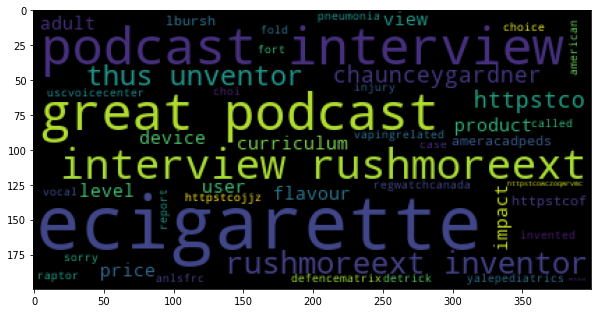

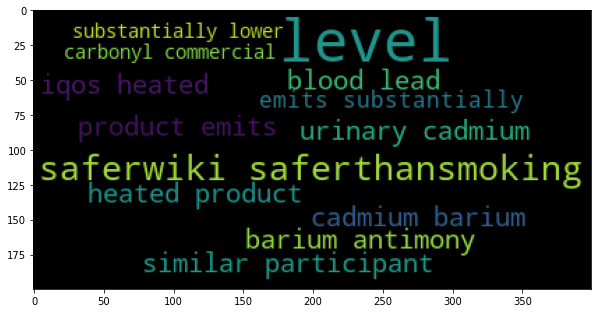

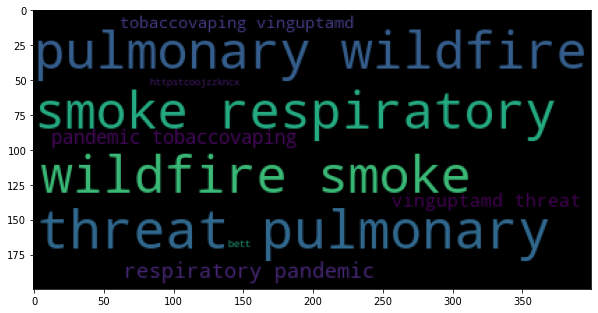

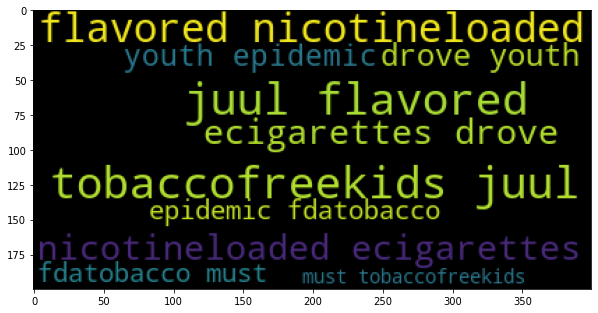

In [133]:
from collections import Counter
df_tfidf_copy = corpus_copy_df.copy()
feature_names_tfidf = vectorizer.get_feature_names()

num_clusters_tfidf = 4 # 0,1,2,3

km_obj_tfidf, clusters_tfidf = k_means(feature_matrix=X,
                           num_clusters=num_clusters_tfidf)

c_tfidf = Counter(clusters_tfidf)

df_tfidf_copy['Cluster'] = clusters_tfidf

# Analyse the k-means clustering data
cluster_data_tfidf =  get_cluster_data(clustering_obj=km_obj_tfidf,
                                 tweet_data=df_tfidf_copy,
                                 feature_names=feature_names_tfidf,
                                 num_clusters=num_clusters_tfidf,
                                 topn_features=10)        

# Print the detailed clustering analysis results
print_cluster_data(cluster_data_tfidf)

We can use Silhouette Coefficient to find the number of clusters too. It is an another metric to find the optimal number of cluseters.

In [134]:
def silhouetteCoefficient(bag_of_words):
    Y = bag_of_words.copy()

    range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
    
    for n_clusters in range_n_clusters:
    
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(Y)
        
        silhouette_avg = silhouette_score(Y, cluster_labels)
        print("For clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

In [135]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_tfidf = silhouetteCoefficient(X)

For clusters = 2 The average silhouette_score is : 0.017126058727650627
For clusters = 3 The average silhouette_score is : 0.02654567113652898
For clusters = 4 The average silhouette_score is : 0.026055480542464392
For clusters = 5 The average silhouette_score is : 0.03178623366257509
For clusters = 6 The average silhouette_score is : 0.0364877004157667
For clusters = 7 The average silhouette_score is : 0.036296802045969
For clusters = 8 The average silhouette_score is : 0.04409779110313822
For clusters = 9 The average silhouette_score is : 0.03722299709575091


Cluster 0 details:
--------------------
Key features: ['httpstco', 'publichealthengland', 'ecigarette', 'cancerresearchuk', 'year', 'assureecig', 'india', 'people', 'stop', 'cessation']
Cluster 1 details:
--------------------
Key features: ['wildfire', 'threat', 'pulmonary', 'tobaccovaping', 'respiratory', 'pandemic', 'vinguptamd', 'smoke', 'gupta', 'paulcogan']
Cluster 2 details:
--------------------
Key features: ['nicotineloaded', 'drove', 'epidemic', 'must', 'fdatobacco', 'tobaccofreekids', 'flavored', 'juul', 'youth', 'ecigarettes']
Cluster 3 details:
--------------------
Key features: ['cigarette', 'sexy', 'choose', 'ugly', 'isnt', 'beelegantordie', 'develop', 'addiction', 'gonna', 'electronic']


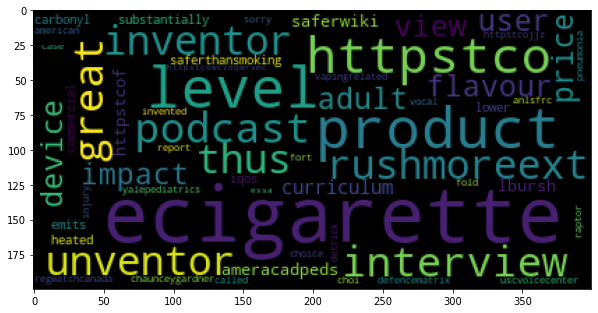

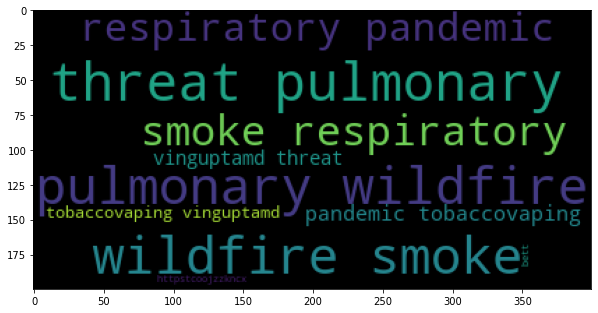

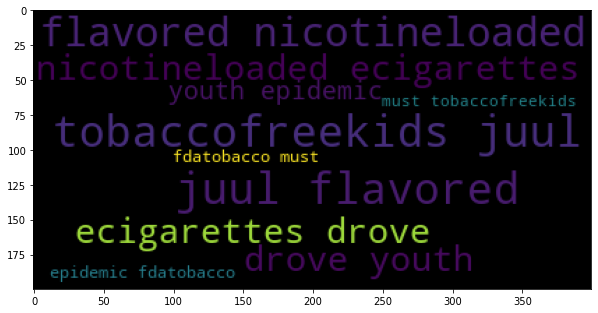

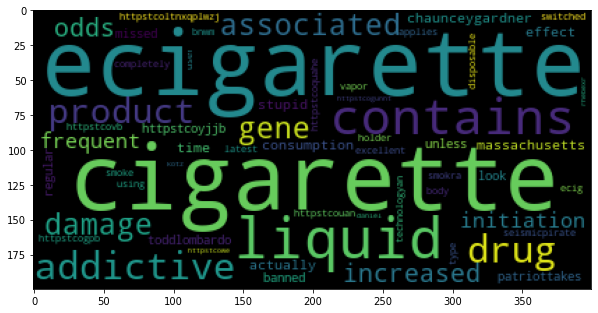

In [136]:
df_tfidf_copy = corpus_copy_df.copy()
feature_names_tfidf = vectorizer.get_feature_names()

num_clusters_tfidf = 4

km_obj_tfidf, clusters_tfidf = k_means(feature_matrix=X,
                           num_clusters=num_clusters_tfidf)

c_tfidf = Counter(clusters_tfidf)

df_tfidf_copy['Cluster'] = clusters_tfidf

# Analyse the k-means clustering data
cluster_data_tfidf =  get_cluster_data(clustering_obj=km_obj_tfidf,
                                 tweet_data=df_tfidf_copy,
                                 feature_names=feature_names_tfidf,
                                 num_clusters=num_clusters_tfidf,
                                 topn_features=10)        

# Print the detailed clustering analysis results
print_cluster_data(cluster_data_tfidf)

# DBSCAN

In [137]:
# import packages
import jieba.posseg as pseg
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.cluster import DBSCAN

In [138]:
# Record the text cut and POS
part_of_speech = []
word_after_cut = []
cut_corpus_iter = corpus_copy_list.copy()
cut_corpus = corpus_copy_list.copy()

In [139]:
len(corpus_copy_list)

31430

In [140]:
for i in range(len(corpus_copy_list)): # 
    cut_corpus_iter[i] = pseg.cut(corpus_copy_list[i])
    cut_corpus[i] = ""
    for every in cut_corpus_iter[i]:
        cut_corpus[i] = (cut_corpus[i] + " " + str(every.word)).strip()
        part_of_speech.append(every.flag)  # 20640
        word_after_cut.append(every.word)  # 20640

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\71948\AppData\Local\Temp\jieba.cache
Loading model cost 0.966 seconds.
Prefix dict has been built successfully.


In [141]:
word_pos_dict = {word_after_cut[i]: part_of_speech[i] for i in range(len(word_after_cut))}

In [142]:
type(word_pos_dict)

dict

In [143]:
# Get the TF-IDF weights
Count_vectorizer = CountVectorizer()

In [144]:
transformer = TfidfTransformer()  # 用于统计每个词语的tf-idf权值

In [145]:
tf_idf = transformer.fit_transform(Count_vectorizer.fit_transform(cut_corpus))

In [146]:
word = Count_vectorizer.get_feature_names()  # 2039，获取词袋模型中的所有词语

In [147]:
weight = tf_idf.toarray()  # （5316，2039）将tf-idf矩阵抽取出来，元素w[i][j]表示j词在i类文本中的tf-idf权重

In [148]:
# Get new weight with POS considered
word_weight = [1 for i in range(len(word))] 

In [150]:
len(weight)

31430

In [151]:
len(word)

33815

In [152]:
for i in range(len(word)):
    if word[i] not in word_pos_dict.keys():
        continue
    if word_pos_dict[word[i]] == 'n':
        word_weight[i] = 1.2
    elif word_pos_dict[word[i]] == "vn":
        word_weight[i] = 1.1
    elif word_pos_dict[word[i]] == "m":
        word_weight[i] = 0
    else:  # 权重调整可以根据实际情况进行更改
        continue

In [159]:
word_weight = np.array(word_weight)

In [161]:
word_weight.shape

(33815,)

In [164]:
new_weight = weight

In [167]:
for i in range(1000): #len(weight)
    for j in range(1000): #len(word)
        new_weight[i][j] = weight[i][j] * word_weight[j]

In [168]:
# Fit the DBSCAN model and get the classify labels
DBS_clf = DBSCAN(eps=100, min_samples=4)

In [178]:
new_weight1 = [[0] * 5000] * 5000
new_weight1 = new_weight[:5000,:5000]

In [179]:
new_weight1.shape

(5000, 5000)

In [180]:
DBS_clf.fit(new_weight1)
print(DBS_clf.labels_)

[0 0 0 ... 0 0 0]


In [181]:
# Define the function of classify the original corpus according to the labels
def labels_to_original(labels, original_corpus):
    assert len(labels) == len(original_corpus)
    max_label = max(labels)
    number_label = [i for i in range(0, max_label + 1, 1)]
    number_label.append(-1)
    result = [[] for i in range(len(number_label))]
    for i in range(len(labels)):
        index = number_label.index(labels[i])
        result[index].append(original_corpus[i])
    return result

In [186]:
len(corpus)

31486

In [188]:
len(DBS_clf.labels_)

5000

In [189]:
corpus1 = corpus[:5000]

In [190]:
len(corpus1)

5000

In [192]:
labels_original = labels_to_original(DBS_clf.labels_, corpus1)

In [196]:
for i in range(5):
    print(labels_original[i])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)], [(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)], [(7, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1)], [(36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)], [(46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)], [(56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)], [(36, 1), (37, 1), (38, 1), (39, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (64, 1), (65, 1)], [(2, 1), (5, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1)], [(56, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1)], [(82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1)], [(94, 1), (95, 1), (96, 1),

IndexError: list index out of range